In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dummy_Prediksi_Tarif_Angkot.csv to Dummy_Prediksi_Tarif_Angkot.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Mengambil data dari file csv**

In [ ]:
file_path = 'Dummy_Prediksi_Tarif_Angkot.csv'
data = pd.read_csv(file_path, sep = ";")
data.head()

,Jarak,Tarif
0,5231,4000
1,9714,7000
2,1345,3000
3,7890,7000
4,1123,3000


# **Pengembangan Model**

**Data Preprocessing**

In [ ]:
X = data["Jarak"].values.reshape(-1, 1)
y = data["Tarif"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mean_X, std_X = np.mean(X_train), np.std(X_train)
mean_y, std_y = np.mean(y_train), np.std(y_train)

X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

y_train = (y_train - mean_y) / std_y
y_test = (y_test - mean_y) / std_y

**Arsitektur Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 0.4018 - mse: 0.4018 - mae: 0.5428
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.3663 - mse: 0.3663 - mae: 0.5186
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.3316 - mse: 0.3316 - mae: 0.4946
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.3010 - mse: 0.3010 - mae: 0.4714
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2711 - mse: 0.2711 - mae: 0.4474
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2443 - mse: 0.2443 - mae: 0.4246
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.2174 - mse: 0.2174 - mae: 0.4010
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1945 - mse: 0.1945 - mae: 0.3798
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1723 - mse: 0.1723 - mae: 0.3581
Epoch 10/100
3/3 [===========================

**Menguji Model**

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

1/1 [==============================] - 0s 80ms/step
Mean Squared Error on Test Data: 0.047369012778314054


**Visualisasi Hasil Prediksi**

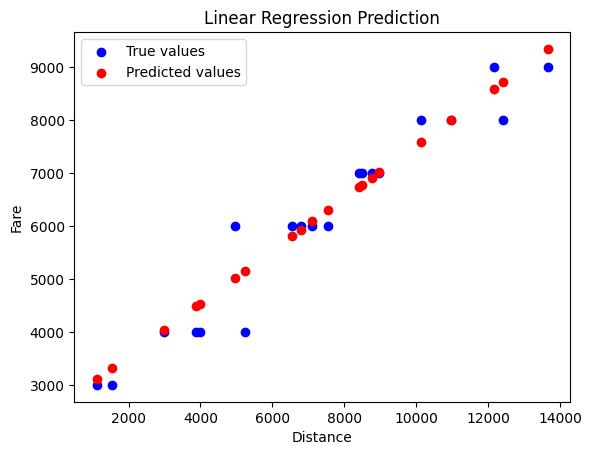

In [ ]:
X_test_denormalized = X_test * std_X + mean_X
y_test_denormalized = y_test * std_y + mean_y
y_pred_denormalized = y_pred * std_y + mean_y

plt.scatter(X_test_denormalized, y_test_denormalized, color='blue', label='True values')
plt.scatter(X_test_denormalized, y_pred_denormalized, color='red', label='Predicted values')
plt.title('Linear Regression Prediction')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.legend()
plt.show()


**Tes Model dengan data baru**

In [ ]:
test_values = np.arange(800, 16000, 1000).reshape(-1, 1)

test_values_normalized = (test_values - mean_X) / std_X

predicted_fares_normalized = model.predict(test_values_normalized)

predicted_fares_denormalized = predicted_fares_normalized * std_y + mean_y

rounded_predicted_fares = np.round(predicted_fares_denormalized / 1000) * 1000

for i in range(len(test_values)):
    print(f'Jarak: {test_values[i, 0]}, Predicted Fare (Rounded): {rounded_predicted_fares[i, 0]}')


1/1 [==============================] - 0s 30ms/step
Jarak: 800, Predicted Fare (Rounded): 3000.0
Jarak: 1800, Predicted Fare (Rounded): 3000.0
Jarak: 2800, Predicted Fare (Rounded): 4000.0
Jarak: 3800, Predicted Fare (Rounded): 4000.0
Jarak: 4800, Predicted Fare (Rounded): 5000.0
Jarak: 5800, Predicted Fare (Rounded): 5000.0
Jarak: 6800, Predicted Fare (Rounded): 6000.0
Jarak: 7800, Predicted Fare (Rounded): 6000.0
Jarak: 8800, Predicted Fare (Rounded): 7000.0
Jarak: 9800, Predicted Fare (Rounded): 7000.0
Jarak: 10800, Predicted Fare (Rounded): 8000.0
Jarak: 11800, Predicted Fare (Rounded): 8000.0
Jarak: 12800, Predicted Fare (Rounded): 9000.0
Jarak: 13800, Predicted Fare (Rounded): 9000.0
Jarak: 14800, Predicted Fare (Rounded): 10000.0
Jarak: 15800, Predicted Fare (Rounded): 10000.0


# **Convert Model**

Install tensorflowjs

In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

Save model ke format .h5

In [ ]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Konversi model menggunakan tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./


2023-11-24 04:39:42.106855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 04:39:42.106942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 04:39:42.108593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 04:39:43.582897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# **Menyimpan Paramater Normalization ke dalam file JSON**

In [ ]:
import json

#print(f'mean_X: {mean_X}')
#print(f'std_X:  {std_X}')
#print(f'mean_y: {mean_y}')
#print(f'std_y:  {std_y}')

normalization_params = {
    'mean_X': mean_X,
    'std_X': std_X,
    'mean_y': mean_y,
    'std_y': std_y
}

with open('./normalization_params.json', 'w') as json_file:
    json.dump(normalization_params, json_file)

mean_X: 6735.0375
std_X:  4149.9135787500145
mean_y: 5925.0
std_y:  2096.276460775153
